**Step 1: Load Required Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Load the Datasets**

In [ ]:
# Load PBJ Staffing Data  and Nursing Home Provider Info
pbj_data = pd.read_csv("/content/PBJ_Daily_Nurse_Staffing_Q2_2024.csv", encoding='mac_roman')
nh_info_data = pd.read_csv("/content/NH_ProviderInfo_Nov2024.csv")

# Display first few rows to understand structure
pbj_data.head()

<ipython-input-22-7cd32a5c300d>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pbj_data = pd.read_csv("/content/PBJ_Daily_Nurse_Staffing_Q2_2024.csv", encoding='mac_roman')


,ÔªøPROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240401,51,10.77,...,0.0,160.08,160.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240402,52,8.43,...,0.0,135.95,135.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240403,53,11.13,...,0.0,150.31,150.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240404,52,12.27,...,0.0,133.01,133.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240405,52,4.95,...,0.0,137.92,137.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Check for missing values
pbj_data.isnull().sum()

,0
ÔªøPROVNUM,0
PROVNAME,0
CITY,0
STATE,0
COUNTY_NAME,0
COUNTY_FIPS,0
CY_Qtr,0
WorkDate,0
MDScensus,0
Hrs_RNDON,0


**Step 3: Standardize Facility ID for Merging**

In [ ]:
# Rename columns for consistency
pbj_data.rename(columns={'ÔªøPROVNUM': 'Facility_ID'}, inplace=True)
nh_info_data.rename(columns={'CMS Certification Number (CCN)': 'Facility_ID'}, inplace=True)

In [ ]:
# Convert Facility_ID to string for both datasets
pbj_data["Facility_ID"] = pbj_data["Facility_ID"].astype(str)
nh_info_data["Facility_ID"] = nh_info_data["Facility_ID"].astype(str)

**Step 4: Merge Datasets**

In [ ]:
merged_data = pd.merge(pbj_data, nh_info_data, on="Facility_ID", how="left")

**Step 5: Calculate Contractor vs. Employee Staffing**

In [ ]:
staffing_summary = merged_data.groupby("Facility_ID").agg({
    "Hrs_RN_emp": "sum",  # Registered Nurse (RN) Employee Hours
    "Hrs_RN_ctr": "sum",   # RN Contractor Hours
    "Hrs_LPN_emp": "sum", # Licensed Practical Nurse (LPN) Employee Hours
    "Hrs_LPN_ctr": "sum",  # LPN Contractor Hours
    "Hrs_CNA_emp": "sum", # Certified Nursing Assistant (CNA) Employee Hours
    "Hrs_CNA_ctr": "sum",  # CNA Contractor Hours
}).reset_index()

In [ ]:
# Calculate the percentage of hours worked by contractors
staffing_summary["RN_Contractor_Percent"] = staffing_summary["Hrs_RN_ctr"] / (staffing_summary["Hrs_RN_emp"] + staffing_summary["Hrs_RN_ctr"]) * 100
staffing_summary["LPN_Contractor_Percent"] = staffing_summary["Hrs_LPN_ctr"] / (staffing_summary["Hrs_LPN_emp"] + staffing_summary["Hrs_LPN_ctr"]) * 100
staffing_summary["CNA_Contractor_Percent"] = staffing_summary["Hrs_CNA_ctr"] / (staffing_summary["Hrs_CNA_emp"] + staffing_summary["Hrs_CNA_ctr"]) * 100
staffing_summary.head()

,Facility_ID,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA_emp,Hrs_CNA_ctr,RN_Contractor_Percent,LPN_Contractor_Percent,CNA_Contractor_Percent
0,015416,2873.00,0.0,4250.75,0.0,15824.25,0.0,0.0,0.0,0.0
1,015417,2110.75,0.0,6094.25,0.0,14882.65,0.0,0.0,0.0,0.0
2,015419,2789.28,0.0,3953.21,0.0,11851.25,0.0,0.0,0.0,0.0
3,015420,2846.25,0.0,3706.03,0.0,18923.83,0.0,0.0,0.0,0.0
4,015422,4765.75,0.0,4923.25,0.0,17631.68,0.0,0.0,0.0,0.0


 **Step 6: Identify High-Contractor-Use Facilities**

In [ ]:
high_contractor_facilities = staffing_summary[
    (staffing_summary["RN_Contractor_Percent"] > 50) |
    (staffing_summary["LPN_Contractor_Percent"] > 50) |
    (staffing_summary["CNA_Contractor_Percent"] > 50)
]

high_contractor_facilities.head(10)

,Facility_ID,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA_emp,Hrs_CNA_ctr,RN_Contractor_Percent,LPN_Contractor_Percent,CNA_Contractor_Percent
53,025037,1020.98,470.19,3862.98,461.65,2207.58,3852.30,31.531616,10.674902,63.570566
154,035249,1300.98,426.15,983.80,2010.46,7247.67,2253.91,24.673881,67.143802,23.721423
164,035263,400.25,3887.50,3188.25,0.00,8724.25,6808.00,90.665267,0.000000,43.831383
182,045417,0.00,1385.00,2091.25,5278.50,8032.50,10996.57,100.000000,71.623868,57.788268
190,045430,173.40,485.75,2930.60,823.99,12605.50,0.00,73.693393,21.946205,0.000000
218,045462,82.25,2782.35,191.25,7726.00,11653.19,11328.15,97.128744,97.584389,49.292818
231,04A293,10295.25,991.75,5736.25,11164.25,41342.00,4970.25,8.786657,66.058696,10.732042
308,055189,3857.04,224.56,1086.73,1941.30,6369.37,8734.36,5.501764,64.110990,57.829159
329,055241,3216.50,0.00,4078.87,153.00,6294.50,10972.75,0.000000,3.615423,63.546598
346,055283,60.76,84.00,944.65,0.00,2136.60,0.00,58.027079,0.000000,0.000000


**Step 7: Identify States with Highest Contractor Usage**

In [ ]:
state_contractor_trends = merged_data.groupby("State").agg({
    "Hrs_RN_ctr": "sum",
    "Hrs_LPN_ctr": "sum",
    "Hrs_CNA_ctr": "sum",
    "Hrs_RN_emp": "sum",
    "Hrs_LPN_emp": "sum",
    "Hrs_CNA_emp": "sum"
}).reset_index()

state_contractor_trends["Total_Contractor_Hours"] = (
    state_contractor_trends["Hrs_RN_ctr"] +
    state_contractor_trends["Hrs_LPN_ctr"] +
    state_contractor_trends["Hrs_CNA_ctr"]
)

state_contractor_trends["Total_Employee_Hours"] = (
    state_contractor_trends["Hrs_RN_emp"] +
    state_contractor_trends["Hrs_LPN_emp"] +
    state_contractor_trends["Hrs_CNA_emp"]
)

state_contractor_trends["Contractor_Percent"] = (
    state_contractor_trends["Total_Contractor_Hours"] /
    (state_contractor_trends["Total_Contractor_Hours"] + state_contractor_trends["Total_Employee_Hours"]) * 100
)

# Sort states by highest contractor usage
state_contractor_trends = state_contractor_trends.sort_values(by="Contractor_Percent", ascending=False)

state_contractor_trends.head(10)  # Top 10 states


,State,Hrs_RN_ctr,Hrs_LPN_ctr,Hrs_CNA_ctr,Hrs_RN_emp,Hrs_LPN_emp,Hrs_CNA_emp,Total_Contractor_Hours,Total_Employee_Hours,Contractor_Percent
45,VT,13289.35,75830.99,160603.52,106687.10,108958.26,314907.88,249723.86,530553.24,32.004510
21,ME,45048.97,71589.41,190710.67,299099.75,144076.95,951610.03,307349.05,1394786.73,18.056671
30,NJ,84237.55,270816.00,703163.93,752710.79,1429158.07,3546403.77,1058217.48,5728272.63,15.593001
36,PA,350130.69,984323.83,1766135.36,2426844.64,4247303.54,10375804.61,3100589.88,17049952.79,15.387128
26,MT,18192.30,25041.72,96834.92,164937.10,116769.22,551997.64,140068.94,833703.96,14.384149
8,DE,32736.67,65509.24,85321.28,152258.14,261182.74,702265.33,183567.19,1115706.21,14.128450
28,ND,19994.13,36354.91,160002.98,211576.29,175716.68,932938.68,216352.02,1320231.65,14.080068
20,MD,60303.85,76767.30,224378.90,357774.96,644322.01,1395480.55,361450.05,2397577.52,13.100632
35,OR,36987.75,84850.76,193946.59,183337.21,414154.67,1519006.80,315785.10,2116498.68,12.983070
32,NY,740925.60,1134243.97,1838669.99,3694404.08,5241983.01,17047273.29,3713839.56,25983660.38,12.505563


**Step 8: Visualize the Data**

**Top 10 states using contractors.**

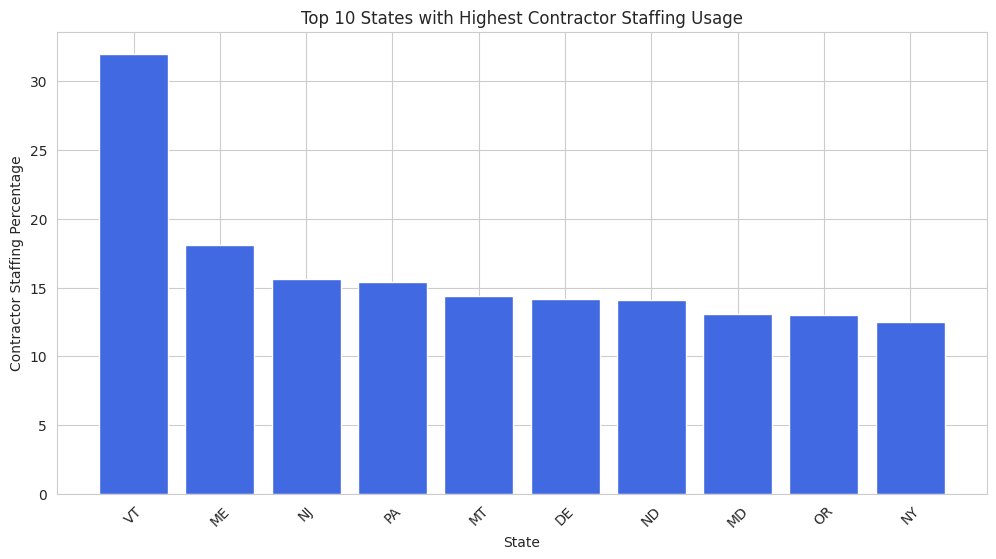

In [ ]:
top_states = state_contractor_trends.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_states["State"], top_states["Contractor_Percent"], color='royalblue')
plt.xlabel("State")
plt.ylabel("Contractor Staffing Percentage")
plt.title("Top 10 States with Highest Contractor Staffing Usage")
plt.xticks(rotation=45)
plt.show()

**Top 10 Nursing Homes with the Highest Contractor Usage**

<ipython-input-47-df55efe54659>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_facilities["Facility_ID"], x=top_facilities["RN_Contractor_Percent"], palette="coolwarm")


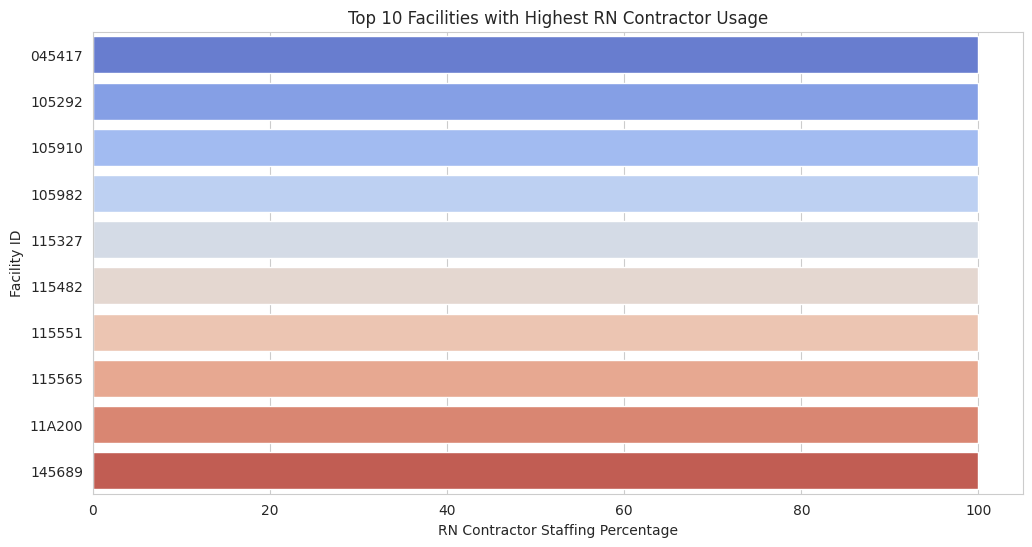

In [ ]:
top_facilities = high_contractor_facilities.nlargest(10, "RN_Contractor_Percent")

plt.figure(figsize=(12, 6))
sns.barplot(y=top_facilities["Facility_ID"], x=top_facilities["RN_Contractor_Percent"], palette="coolwarm")
plt.xlabel("RN Contractor Staffing Percentage")
plt.ylabel("Facility ID")
plt.title("Top 10 Facilities with Highest RN Contractor Usage")
plt.show()

**Heatmap of Contractor Usage by Job Role**

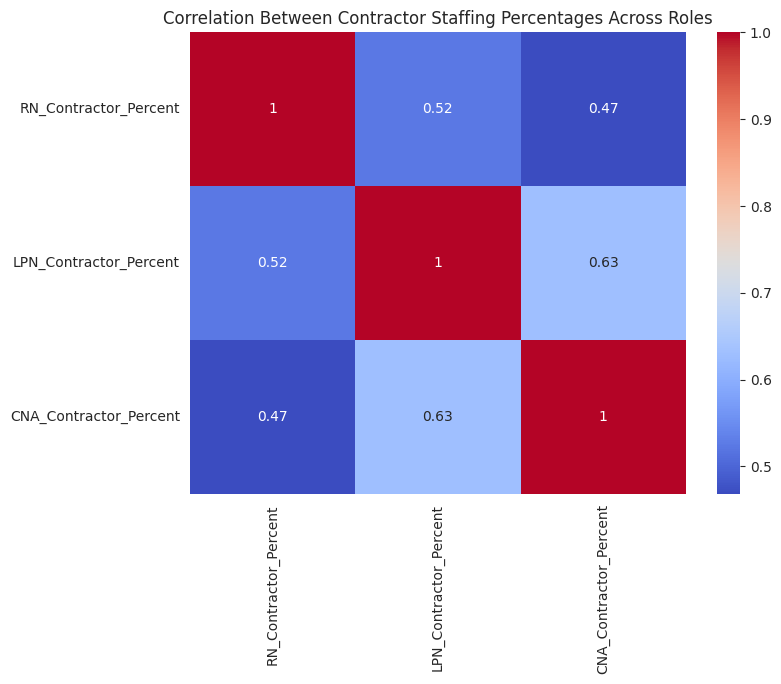

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(staffing_summary[["RN_Contractor_Percent", "LPN_Contractor_Percent", "CNA_Contractor_Percent"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Contractor Staffing Percentages Across Roles")
plt.show()

**Pie Chart of Total Contractor vs. Employee Staffing**

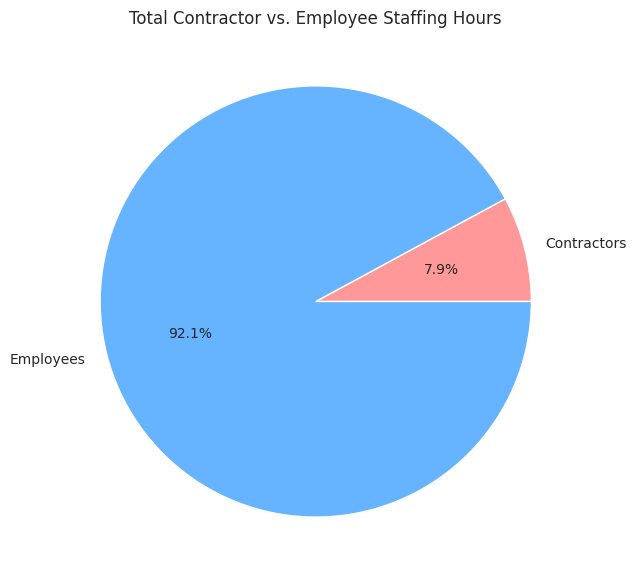

In [ ]:
total_contractor_hours = state_contractor_trends["Total_Contractor_Hours"].sum()
total_employee_hours = state_contractor_trends["Total_Employee_Hours"].sum()

plt.figure(figsize=(7, 7))
plt.pie([total_contractor_hours, total_employee_hours], labels=["Contractors", "Employees"], autopct="%1.1f%%", colors=["#ff9999", "#66b3ff"])
plt.title("Total Contractor vs. Employee Staffing Hours")
plt.show()

# Sales Recommendations
**Based on the analysis, here are some key takeaways for Clipboard Health's sales team:**

1. Focus on states where contractor staffing is highest, as these represent the biggest opportunities for growth.

2. Identify regions where contractor reliance is increasing, signaling a long-term demand for staffing support.

3. Nursing homes where contractors make up more than 50% of staffing hours are likely struggling with full-time hiring.

4. If past quarters' data is available, compare how contractor usage has changed to identify emerging trends. This helps anticipate future demand and align sales strategies accordingly.